In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


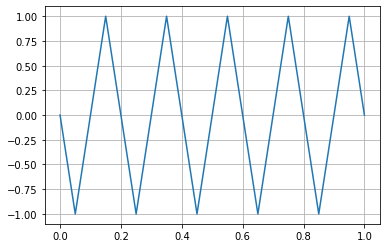

In [11]:
Δd = 0.1
l = 1
ns = 10
p = np.arange(ns+2, dtype=np.float) 
p2 = np.power((-1),p)
p[0]=.5
p2[0]=0
p[-1]=10.5
p2[-1]=0

p-=0.5
p/=ns
plot(p,p2)
p

grid()

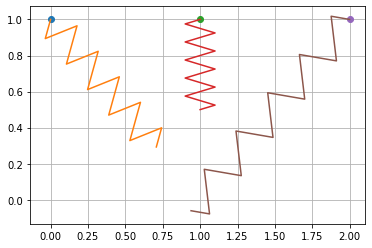

In [46]:
RotY = lambda θ: [[cos(θ), sin(θ)], 
         [-sin(θ), cos(θ)]]

def spring(x,z, θ, l, ns=10, width = 0.2):
   
    
    px = np.arange(ns+2, dtype=np.float) 
    pz = np.power((-1),px) * width / 2
    px[0] = .5
    pz[0] = 0
    px[-1] = 10.5
    pz[-1] = 0

    px -= 0.5
    px /= ns  # between zero and one
    px *= l  # extend or compress to lenght l
    
    # Rotation
    R = RotY(θ + pi/2)
    points = array([np.dot(R, [pxi, pzi]) for pxi,pzi in zip(px, pz)])
    px, pz = points[:,0], points[:,1]
    
    # Translation
    px+=x
    pz+=z
    
    return px, pz


def draw_spring(x,z, θ, l, ax=plt):
    px, pz = spring(x,z, θ, l)
    ax.plot(px[0], pz[0], 'o')
    ax.plot(px, pz)
    

draw_spring(0,1, -pi/4,1)
draw_spring(1,1, 0,.5)
draw_spring(2,1, pi/4,1.5)
grid()

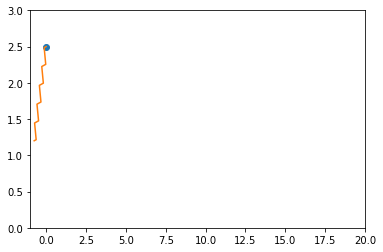

In [66]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()


def animate(t):
    ax.clear()
    ax.set_xlim(-1,20)
    ax.set_ylim(0,3)
   
    x = .1*t
    z = cos(.1*t)  + 1.5
    θ = pi/6*cos(.1*t)
    l = 1+ 0.5* cos(.1*t)
    draw_spring(x,z, θ, l)
        

anim = animation.FuncAnimation(fig, animate, frames=200, interval=50)
#HTML(anim.to_jshtml())

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  4.98100000e-01
   4.98100000e-01  4.00000000e-01]
 [ 4.98100000e-03  4.98100000e-03  4.00000000e-03  9.84200000e-01
   9.84200000e-01  7.88000000e-01]
 ...
 [ 8.89714037e+01  8.89714037e+01  5.17940230e+00  1.24982545e+01
   1.24982545e+01 -2.98828625e+00]
 [ 8.90963863e+01  8.90963863e+01  5.14951944e+00  1.24982545e+01
   1.24982545e+01 -3.30372882e+00]
 [ 8.92213688e+01  8.92213688e+01  5.11648215e+00  1.24982545e+01
   1.24982545e+01 -3.61612002e+00]]
801


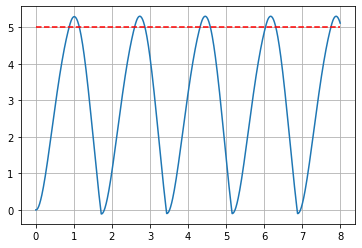

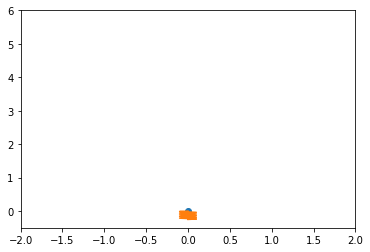

In [67]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import numpy as np
import math


#Euler Integration
def simulate(Δt, x, u):
    x += Δt * u
    return x

#Simulation Parameters
freefall = False

#mass and gravity
m = 1
g = 9.81
k = 10
b = 0.02
l = 3 #length of spring at rest position

#Gains
kp = 8
kd = 3

#Desired height and velocity
z_d = 5
vz_d = 0

#z unit vector
e3 = np.array([0,0,1])
tf = 8.0
Δt = 0.01
time = np.linspace(0.0,tf,int(tf/Δt)+1)

#initial conditions
x = np.array([0.0,0.0,0.0,0.0,0.0,0.0])
dx = np.zeros(6)

x_log = [np.copy(x)]
tm_log = [np.copy(x)]

for t in time[1:]:
    z = x[2]
    vz = x[5]

    u = kp*(z_d-z) + kd*(vz_d-vz) + g
    #Total force
    f_t = (-m*g-b*vz-k*(z-l))*e3
    
    if(freefall):
        if(z <= 0):
            dx[3:] = np.zeros(3)
            x[3:] = np.zeros(3)
            freefall = False
        else:
            #Dynamics
            dx[:3] = x[3:]
            dx[3:] = f_t/m            
    else:
        #Dynamics
        dx[:3] = x[3:]
        dx[3:] = u/m-g * e3
        if (z >= z_d): 
            freefall = True

    x = simulate(Δt, x, dx)
    tm = x*0
    x_log.append(np.copy(x))
    tm_log.append(np.copy(tm))
x_log = np.array(x_log)
tm_log = np.array(tm_log)

print(x_log)
print (len(time))
#plot time Vs z-coordinate
plt.grid()
plt.plot(time,x_log[:,2])
plt.plot(time[[0,-1]], [z_d, z_d], 'r--', label='$z_d$')


RotY = lambda θ: [[math.cos(θ), math.sin(θ)], 
         [math.sin(-θ), math.cos(θ)]]

def spring(x,z, θ, l, ns=10, width = 0.2):
   
    
    px = np.arange(ns+2, dtype=np.float) 
    pz = np.power((-1),px) * width / 2
    px[0] = .5
    pz[0] = 0
    px[-1] = 10.5
    pz[-1] = 0

    px -= 0.5
    px /= ns  # between zero and one
    px *= l  # extend or compress to lenght l
    
    # Rotation
    R = RotY(θ + math.pi/2)
    points = np.array([np.dot(R, [pxi, pzi]) for pxi,pzi in zip(px, pz)])
    px, pz = points[:,0], points[:,1]
    
    # Translation
    px+=x
    pz+=z
    
    return px, pz


def draw_spring(x,z, θ, l, ax=plt):
    px, pz = spring(x,z, θ, l)
    ax.plot(px[0], pz[0], 'o')
    plt.grid()
    ax.plot(px, pz)
    
'''
draw_spring(0,1, (math.pi)/-4,1)
draw_spring(1,1, 0,.5)
draw_spring(2,1, math.pi/4,1.5)
'''

#####################################################################
#Animation
#####################################################################
fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    ax.set_xlim(-2,2)
    ax.set_ylim(-0.5,6)
    #Path
    #plt.plot(tm_log[:,0],x_log[:,2], 'r--')
 
    #Initial Conditions
    #plt.plot(tm_log[t,0], x_log[t,2], 'bo')
    
    x = tm_log[t,0]
    z = x_log[t+1,2]
    l = 0.25+z/2
    θ = 0
    draw_spring(x,z,θ,l)
    ax.grid()

anim = FuncAnimation(fig, animate, frames=len(time), interval=1)
#anim.save('free_fall.gif', writer='imagemagick')


IndexError: index 801 is out of bounds for axis 0 with size 801

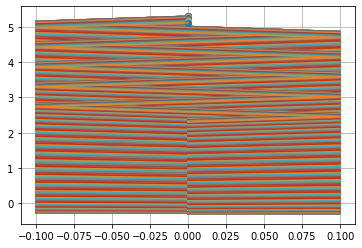

In [68]:
HTML(anim.to_jshtml())